In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

/Users/kilingcheung/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("../Intro_ML/Data/FIFA 2018 Statistics.csv")

In [5]:
y = (data['Man of the Match']=='Yes')
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

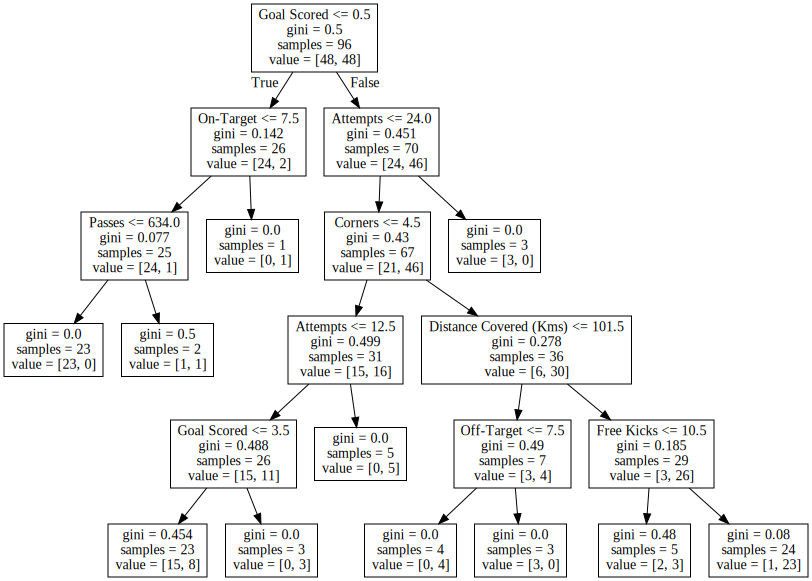

In [9]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

In [12]:
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
%matplotlib inline

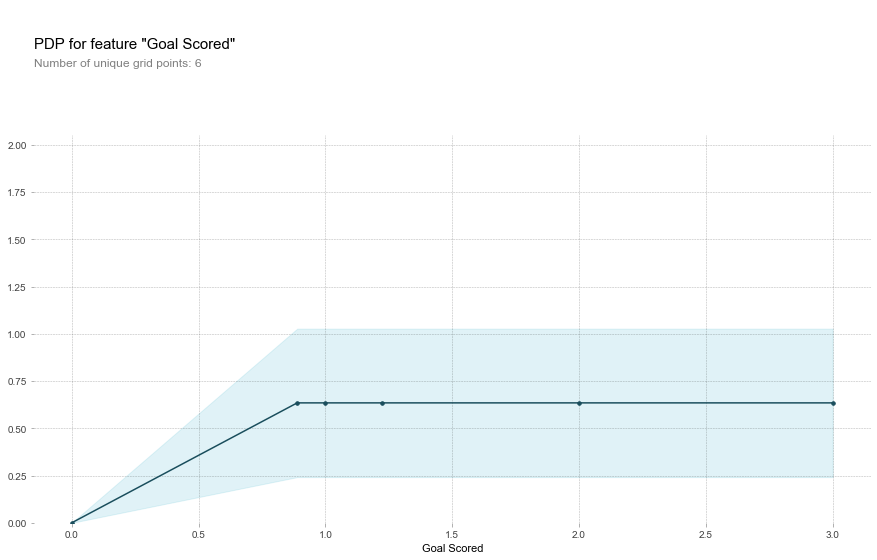

In [13]:
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names,
                           feature='Goal Scored')
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

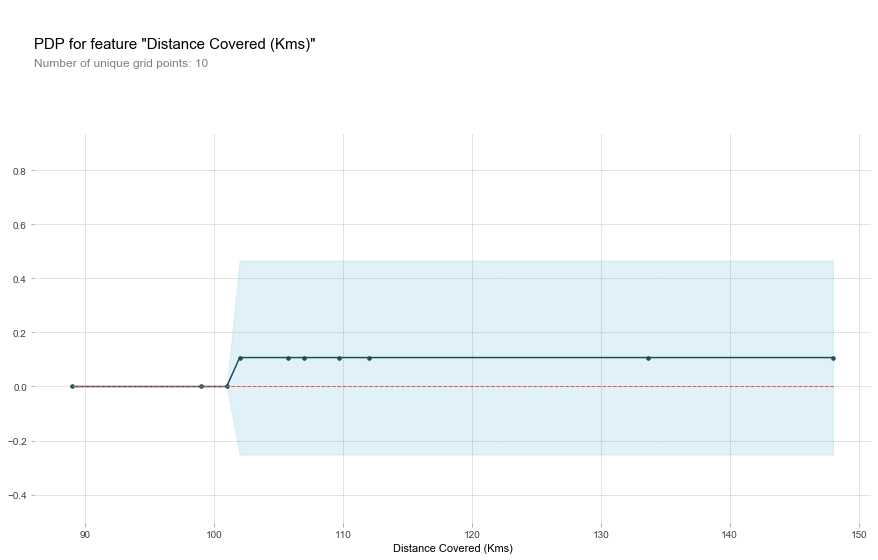

In [14]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names,
                          feature = feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [15]:
def show_depend_plot(which_model, which_feature):
    pdp_1 = pdp.pdp_isolate(model=which_model, dataset=val_X, model_features=feature_names,
                           feature=which_feature)
    pdp.pdp_plot(pdp_1, which_feature)
    plt.show()

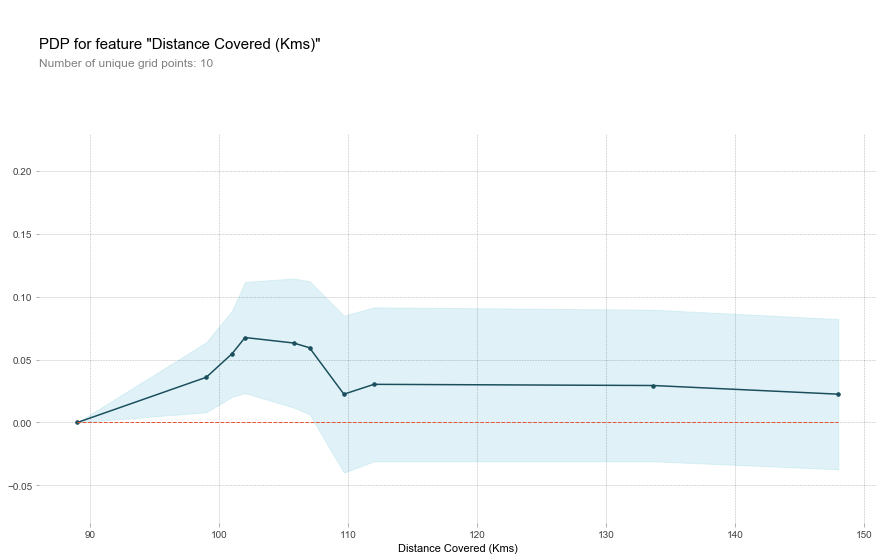

In [19]:
# model1 : DecisionTreeClassifier
#model1 = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)
model1 = RandomForestClassifier(random_state=0).fit(train_X, train_y)
my_feature = 'Distance Covered (Kms)'
show_depend_plot(model1, my_feature)

In [37]:
def show_2D_depend_plot(which_model, which_feature_list):
    inter1 = pdp.pdp_interact(model=which_model, dataset=val_X, model_features=feature_names,
                             features=which_feature_list)
    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=which_feature_list, plot_type='contour')
    plt.show()

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

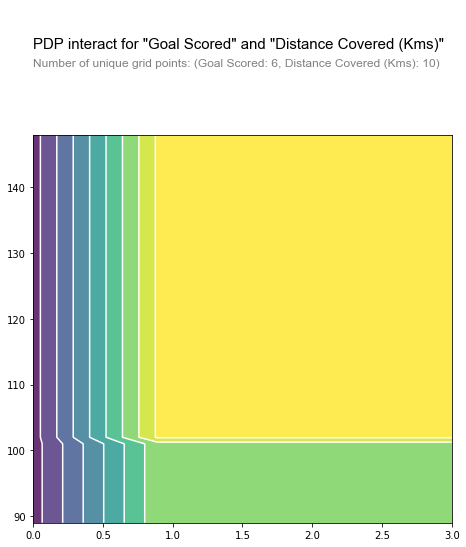

In [38]:
#lt.clabel(fontsize=10)
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
show_2D_depend_plot(tree_model, features_to_plot)

In [23]:
#help(pdp.pdp_interact_plot)